# Emotion Detection

In [1]:
# Libraries Needed
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


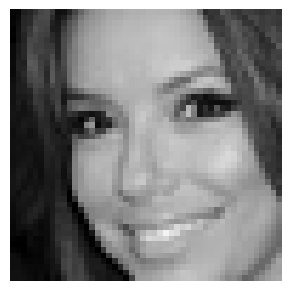

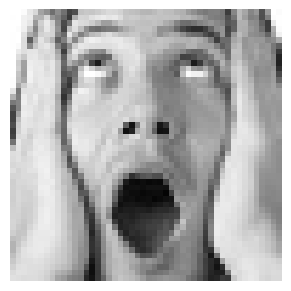

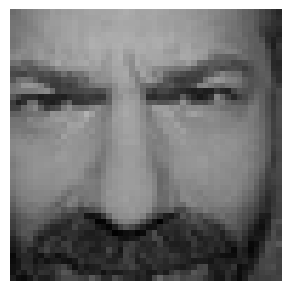

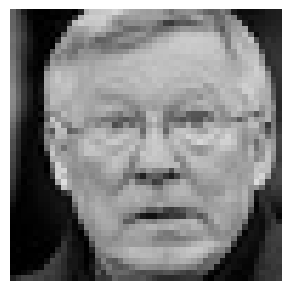

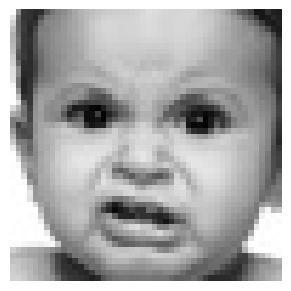

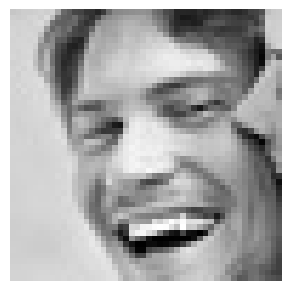

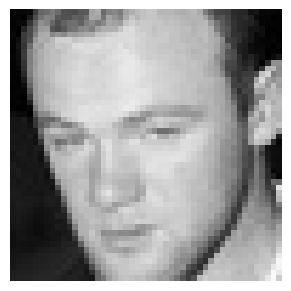

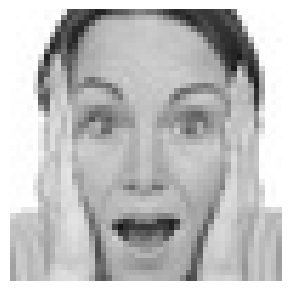

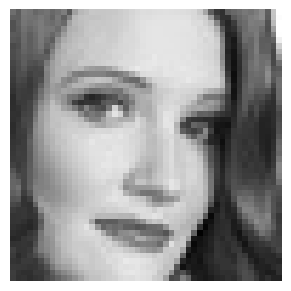

In [2]:
# Exploring Dataset
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [3]:
# Preparing Data for Training
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Defining the Model
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)#decrease the image, finding the features in image
    x = BatchNormalization()(x) #to remove overfitting and get training sone smoothly
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x) #Decrease the dimension of the data for smooth training
    x = Dropout(0.1)(x) #to remove overfitting
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1) #7 for 7 emotions to get array of size 7
    model  =  Model(inputs=[inputs],outputs = [output])
    
    opt = Adam(learning_rate=0.001)
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = opt , metrics =["accuracy"])

    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
# Initializing the Model
epochs = 60
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint(
    "model_weights.weights.h5",
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)
callbacks = [checkpoint]

In [9]:
#Training the Model
#The next cell takes time to Complete

In [10]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.3430 - loss: 1.7298
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 193s 426ms/step - accuracy: 0.3431 - loss: 1.7294 - val_accuracy: 0.4333 - val_loss: 1.5180
Epoch 2/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:16 171ms/step - accuracy: 0.5625 - loss: 1.3907
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5625 - loss: 1.3907 - val_accuracy: 0.4323 - val_loss: 1.5184
Epoch 3/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.5028 - loss: 1.3062
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.5028 - loss: 1.3062 - val_accuracy: 0.4833 - val_loss: 1.3271
Epoch 4/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:17 173ms/step - accuracy: 0.4688 - loss: 1.3303
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4688 - loss: 1.3303 - val_acc

448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8594 - loss: 0.4440 - val_accuracy: 0.5992 - val_loss: 1.3940
Epoch 27/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8950 - loss: 0.3011
Epoch 27: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.8950 - loss: 0.3012 - val_accuracy: 0.5749 - val_loss: 1.5086
Epoch 28/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:39 223ms/step - accuracy: 0.9062 - loss: 0.4140
Epoch 28: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9062 - loss: 0.4140 - val_accuracy: 0.5672 - val_loss: 1.5270
Epoch 29/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9093 - loss: 0.2706
Epoch 29: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.9093 - loss: 0.2707 - val_accuracy: 0.5693 - val_loss: 1.5089
Epoch 30/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:16 171ms/step - accuracy: 0.8438 - loss: 0.4414
Epoch 30: sa

Epoch 52/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:14 168ms/step - accuracy: 0.9219 - loss: 0.2657
Epoch 52: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9219 - loss: 0.2657 - val_accuracy: 0.5838 - val_loss: 1.7310
Epoch 53/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9613 - loss: 0.1225
Epoch 53: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.9613 - loss: 0.1225 - val_accuracy: 0.5975 - val_loss: 1.7536
Epoch 54/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:19 177ms/step - accuracy: 0.9375 - loss: 0.1522
Epoch 54: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9375 - loss: 0.1522 - val_accuracy: 0.5972 - val_loss: 1.7453
Epoch 55/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9591 - loss: 0.1238
Epoch 55: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.9591 - loss: 0.1238 - va

In [11]:
# Model Evaluation
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.5895 - loss: 1.8851


[1.8601329326629639, 0.5883254408836365]

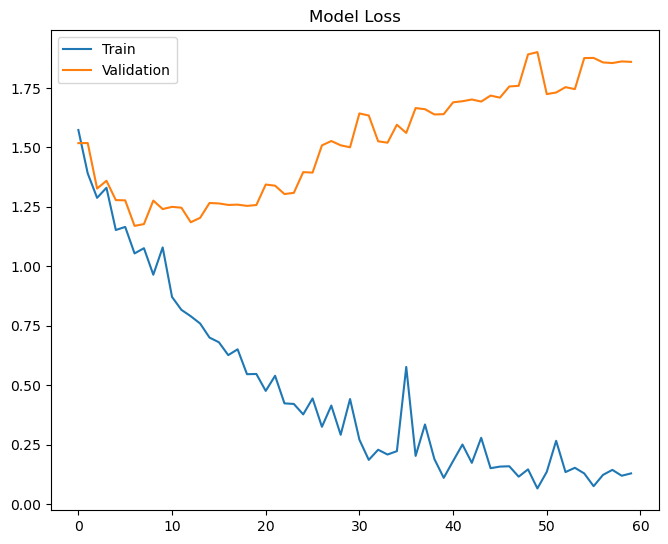

In [12]:
#Plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

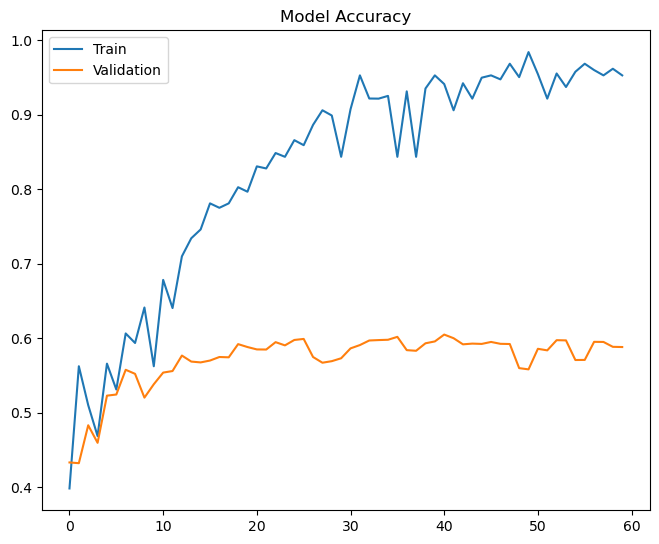

In [13]:
#Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [14]:
#Saving Model
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)